In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
#get count of twitter User per generation
userScrapedProfile = pd.read_csv("dataCleaned.csv")
userSummary = userScrapedProfile.groupby(['generation']).agg({'twitterUser': ['count']})
userSummary['user%'] = userSummary['twitterUser'].apply(lambda x: 100 * x / float(x.sum()))
userSummary

,twitterUser,user%
,count,
generation,,
00s,15,4.901961
30s,6,1.960784
40s,17,5.555556
50s,27,8.823529
60s,55,17.973856
70s,53,17.320261
80s,55,17.973856
90s,78,25.490196


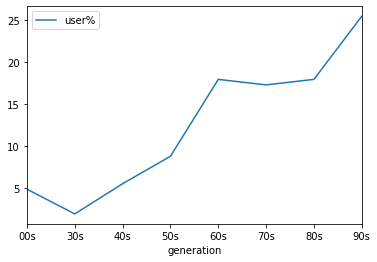

In [77]:
#graph for number or user for each generation
userSummary.plot(y='user%')
# summary.plot()

In [78]:
userTweets = pd.read_csv("tweetsData.csv")
userTweets.columns = ['name','lang','date','tweets','generation']
userTweetSummary = userTweets.groupby(['generation']).agg({'tweets': ['count']})
userTweetSummary['Tweet%'] = userTweetSummary['tweets'].apply(lambda x: 100 * x / float(x.sum()))
userTweetSummary

,tweets,Tweet%
,count,
generation,,
00s,22799,3.408661
30s,4761,0.711813
40s,41016,6.132271
50s,50887,7.608076
60s,118813,17.763641
70s,115003,17.194011
80s,141240,21.116684
90s,174336,26.064842


In [79]:
summary = pd.merge(
    userSummary, 
    userTweetSummary, 
    left_index=True, 
    right_index=True, 
    how='outer'
)
summary

,twitterUser,user%,tweets,Tweet%
,count,,count,
generation,,,,
00s,15,4.901961,22799,3.408661
30s,6,1.960784,4761,0.711813
40s,17,5.555556,41016,6.132271
50s,27,8.823529,50887,7.608076
60s,55,17.973856,118813,17.763641
70s,53,17.320261,115003,17.194011
80s,55,17.973856,141240,21.116684
90s,78,25.490196,174336,26.064842


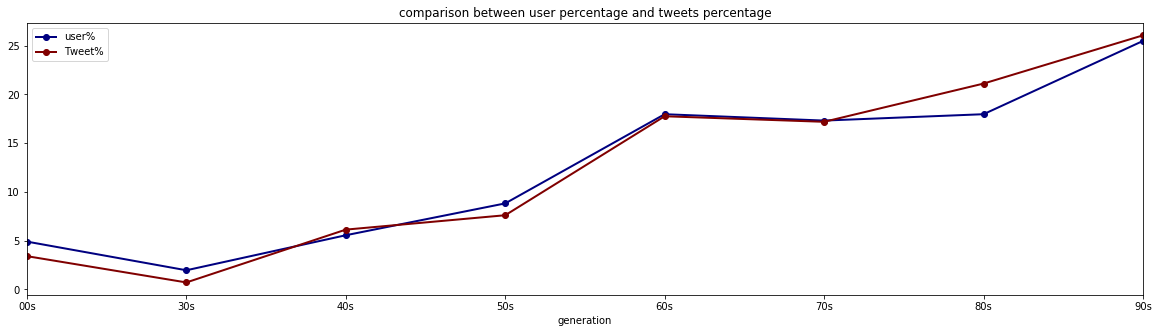

In [80]:
summary.plot(
    title='comparison between user percentage and tweets percentage', 
    lw=2, 
    colormap='jet', 
    marker='.',
    markersize=12, 
    figsize=(20,5), 
    y=['user%', 'Tweet%']).legend(["user%", "Tweet%"])